In [1]:
import numpy as np, matplotlib.pyplot as plt, tensorflow as tf, tensorflow.keras as keras # Package imports 

2022-02-22 13:28:05.153704: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /alt/applic/spack/linux-ubuntu16.04-x86_64/gcc-7.2.0/miniconda3-4.8.2-iiyixgv4a7vez23nbdd2kgwrzfmm3wpp/lib
2022-02-22 13:28:05.153791: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Neural Networks - Deep Learning

Inspired by the brain, the neurons refer to objects that hold information, and they are connected by functions that form the network structure.

Basic network strucures have an input layer, of size corresponding to the "dimension" of the incoming data, and an outplut layer that is specific to the task. For a regression task this may be a single neuron, to give a single value, or for a classification task this would correspond to the number of classes.

What makes Neural Networks powerful, over the methods used earlier is their ability to have hidden layer between the input and output layers, and this ability to nest operations makes them able to capture more complex patterns in the data - these additional layers are referred to as 'Hidden Layers'.

![FFNN](img/nn.png)

This image shows a feed forward neural network- named as such because nothing particualrly special is taking place, the outputs of one layer, become the inputs to the next layer, and thus the information is few forward through the network from the input layer to the output layer.

This strucure is supposed to be loosely based on biological structures, such as the brain, where information from one neuron firing causes other neurons to fire.

As mentioned this is a Feed Forward Neural Network, however there are other network architectures that are used for various tasks, some basic examples are:

Other Types of Network Architectures:
    - Convolutional Neural Network - Image Processing
    - Recurrent Neural Networks - Time Series Data
    - Graph Neural Network - 


However, there are variations of each of these, and developing new archictures is a very active research field, where the balance between model acuracy and computataional expense are being ...

As with the other machine learning methods mentioned earlier, a model must be trained on data, before the trained model can be used for inference on new data. Again, the data can come in both the form of labelled and unlabelled data for various supervised and unsupervised tasks.

For this workshop we will be looking at an image recognition task, one to classify handwritten digits, which is a "canconical" task, using the MNIST dataset - which is a labelled dataset with ...

Here the inputs to the network are the N x N pixel images, and the output layer consists of 10 neurons, each reprenting a value in the set of [0, 9]. Here a trained network should be able to take in an input image, process what within the image characterises the digit that is represents, and with that information, will pass an array of values to the final layer. Here the output will be that array of 10 values, that correspond 'anaolgously' to the network's confidence in classifying the image as that value. I.e., as can be seen here, the network, attibutes the largest value to the number 'N' - which can be interpreteed as the network 'guessing' that this image is a number 'N', while, with a small probability, ...

Now how would the network learn these features, before jumping into the mathematics of this process, lets think of how a human would learn identifiy a '9' for example. One may first identify the loop at the top, and secondarily the the line that comes down from that loop. Of course when also shown another image of a 9, a human can still indentify that the image is indeed of a 9, eventhough the image is not quite the same as the fist, where the loop is different and the line is now curved. When training out network, we hope that it too would be invarient to these small differences and would not classify based on exact locations of pixels within the image domian, but use structres, or features, within the image that are learnt to corespond to the image label.

This is where the notion of layers comes in ... not specific to images here, this could be a time series corresponding to speech, where raw audo must be broken down into district sounds that together form syllables which in turn form words... breaks down into layers of abstraction ...









So what is training and how can these networks?

https://codelabs.developers.google.com/codelabs/cloud-tensorflow-mnist#3


Talk about network strucuter and funtions

Once a network has been trained ...


Within this strucutre there is room for experimentation to obtain an network strucutre that is optimal for the task, parameters ...



In [18]:
# import MNIST dataset
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


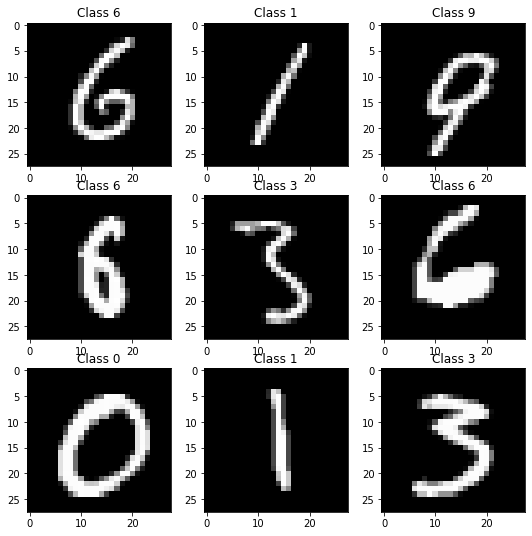

In [5]:
plt.figure(figsize=(9,9))

for i in range(9):
    plt.subplot(3,3,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

In [8]:
X_train = X_train.reshape(60000, 784)/255  # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors and normalise each value
X_test = X_test.reshape(10000, 784)/255  # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [22]:
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/255 

In [23]:
nb_classes = 10 # number of unique digits

Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

## Multi-Layer Perceptron

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28, 1]),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(10, activation='softmax')]) # classifying into 10 classes


print(model.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 200)               157000    
                                                                 
 dense_19 (Dense)            (None, 60)                12060     
                                                                 
 dense_20 (Dense)            (None, 10)                610       
                                                                 
Total params: 169,670
Trainable params: 169,670
Non-trainable params: 0
_________________________________________________________________
None


## Optimisation

In [25]:
# this configures the training of the model. Keras calls it "compiling" the model.
model.compile(
    optimizer='adam',
    loss= 'categorical_crossentropy',
    metrics=['accuracy']) # % of correct answers


## Back Propogation

#  Train Model

In [26]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5


2022-02-22 13:56:15.974109: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 6s 7ms/step - loss: 0.3002 - accuracy: 0.9151
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1184 - accuracy: 0.9654
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0787 - accuracy: 0.9758
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0589 - accuracy: 0.9822
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0450 - accuracy: 0.9863


# Evaluation

In [27]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0818 - accuracy: 0.9753
Test score: 0.08177376538515091
Test accuracy: 0.9753000140190125


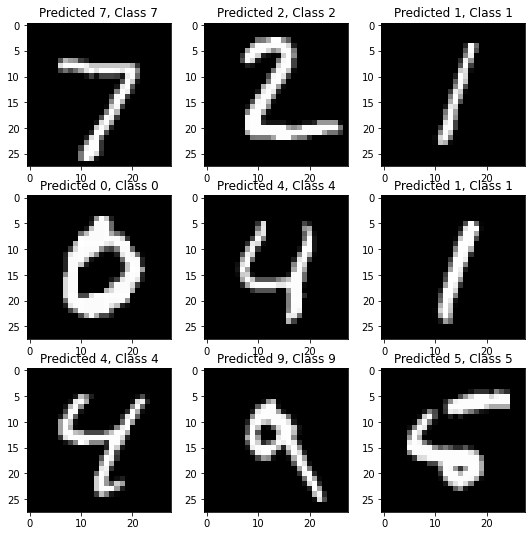

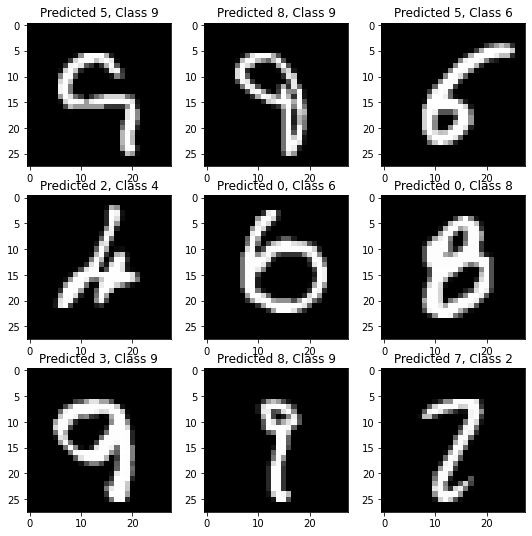

In [67]:
# The predict_classes function outputs the highest probability class according to the trained classifier for each input example.
predicted_classes = model.predict(X_test)

# Check which items we got right / wrong
correct_indices, incorrect_indices = [], []
for index, prediction_array in enumerate(predicted_classes):
    prediction = np.argmax(prediction_array)  #use the largest value of the array as the network's prediction
    Y_label    = np.argmax(Y_test[index])     #use the largest value of the array as the truth label
    if prediction == Y_label:   correct_indices.append(index)
    else:                     incorrect_indices.append(index)

for index, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(np.argmax(predicted_classes[correct]), y_test[correct]))
plt.show()
    
for index, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(np.argmax(predicted_classes[incorrect]), y_test[incorrect]))
plt.show()

# Art vs Science - Experimentation

How does increasing the batch size to 10,000 affect the training time and test accuracy?

How about a batch size of 32?

## Overfitting

## Regularisation

# Conv Nets?